29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


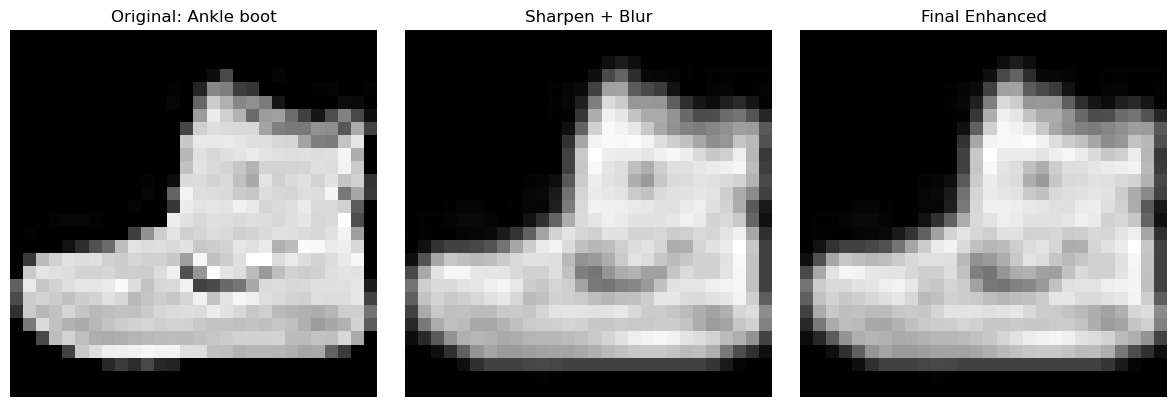

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Class names in Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load Fashion MNIST dataset
(x_train, y_train), _ = fashion_mnist.load_data()

# Select first image and label
image = x_train[0]
label = y_train[0]
label_name = class_names[label]

# Define sharpen filter kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# Define Gaussian blur kernel
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16

# Convolution function
def apply_convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)
    return output

# Apply filters
sharpened = apply_convolution(image, sharpen_kernel)
smoothed = apply_convolution(sharpened, gaussian_kernel)
final_output = np.interp(smoothed, (smoothed.min(), smoothed.max()), (0, 255)).astype(np.uint8)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title(f"Original: {label_name}")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sharpen + Blur")
plt.imshow(smoothed, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Final Enhanced")
plt.imshow(final_output, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
